<h1> Object detection using faster RCNN</h1>

This notebook contain code of implementing faster RCNN model to detec objects on images.

**First importing necessary libraries**

In [ ]:
import numpy as np
import os
import pandas as pd
import torch
import time
from operator import add

from PIL import Image, ImageFile
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import torch
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split, Dataset
import copy
import math

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset is in different format and the model requires inout in different format. Hence this function serves the purpose of providing correct input.

In [ ]:
class MyDataset(Dataset):
 
  def __init__(self,file_name, img_dir,label_dir):

    self.file=pd.read_csv(file_name, nrows=100)
    self.img_dir = img_dir
    self.label_dir = label_dir

    # self.train_df = pd.DataFrame(self.file)
    # self.sample=train_df.head(10)
 
  def __len__(self):
    return len(self.file)
   
  def __getitem__(self, index):
        
        #tt=[]
        dd={}
        for i in range(len(self.file)):
          #dd={}
          label_path = os.path.join(self.label_dir, self.file.iloc[i, 1])
          bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()
          img_path = os.path.join(self.img_dir, self.file.iloc[i, 0])
          image = np.array(Image.open(img_path).convert("RGB"))
          # print(len(bboxes))
          temp1=[]
          temp2=[]
          for b in range(len(bboxes)):
            tempo = bboxes[b][0:4]
            pupu=list( map(add, tempo[2:4], tempo[0:2]) )
            temp1.append(tempo[0:2]+pupu)
            #temp_box = torchvision.ops.box_convert(bboxes[b][0:4], "cxcywh", "xyxy")
            #temp1.append(temp_box)
            temp3= bboxes[b][4:5]
            s = [str(integer) for integer in temp3]
            a_string = "".join(s)
            res = int(float(a_string))
            temp2.append(res)
            
          dd['boxes'] = torch.Tensor(temp1)
          dd['labels'] =torch.tensor(temp2)
          #tt.append(dd)

        #img_list=[]
        for i in range(len(self.file)):
          
          img_path = os.path.join(self.img_dir, self.file.iloc[i, 0])
          image = np.array(Image.open(img_path).convert("RGB"))
          hh=torch.permute(torch.Tensor(image), (2,0,1))
          #img_list.append(hh)

        return hh, dd

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

TRAIN_PATH = '/content/drive/MyDrive/pascalvoc/train.csv'
TEST_PATH = '/content/drive/MyDrive/pascalvoc/test.csv'
IMG_DIR = '/content/drive/MyDrive/pascalvoc/images'
LABEL_DIR = '/content/drive/MyDrive/pascalvoc/labels'

ds_train = MyDataset(TRAIN_PATH, IMG_DIR, LABEL_DIR)
ds_val = MyDataset(TEST_PATH, IMG_DIR, LABEL_DIR)

dl_train = DataLoader(ds_train, batch_size=1, shuffle=False, num_workers=4, collate_fn=collate_fn)
dl_val = DataLoader(ds_val, batch_size=1, shuffle=False, num_workers=4, collate_fn=collate_fn)

Due to limited time and resources, only 5 epochs are run on small subset of data.

In [ ]:
NUM_EPOCHS = 5

This function is to plot the graphs

In [ ]:
def experiment_plots(Epoch_list, train_loss_list, test_loss_list):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,6))

  ax1.plot(Epoch_list, train_loss_list, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='black', markersize=12)
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('loss')
  ax1.grid()
  ax2.plot(Epoch_list, test_loss_list, color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='black', markersize=12)
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Class Accuracy')
  ax2.grid()

  fig.tight_layout()

  plt.show()

the code block below is purposefully stopped keeping the resource of the machine in mind.

For optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.0003
    maximize: False
    weight_decay: 0
)


100%|██████████| 100/100 [39:19<00:00, 23.59s/it]


[Epoch  1 /  5] Train loss: 208.089. Val loss: 315.488 --> fasterrcnn_resnet50_fpn-e0.bin  [3166 secs]


100%|██████████| 100/100 [39:07<00:00, 23.48s/it]


[Epoch  2 /  5] Train loss: 210.590. Val loss: 315.181 --> fasterrcnn_resnet50_fpn-e1.bin  [3160 secs]


100%|██████████| 100/100 [38:52<00:00, 23.33s/it]


[Epoch  3 /  5] Train loss: 208.816. Val loss: 314.538 --> fasterrcnn_resnet50_fpn-e2.bin  [3137 secs]


100%|██████████| 100/100 [38:43<00:00, 23.23s/it]


[Epoch  4 /  5] Train loss: 210.604. Val loss: 313.815 --> fasterrcnn_resnet50_fpn-e3.bin  [3123 secs]


100%|██████████| 100/100 [38:46<00:00, 23.27s/it]


[Epoch  5 /  5] Train loss: 210.024. Val loss: 315.215 --> fasterrcnn_resnet50_fpn-e4.bin  [3123 secs]


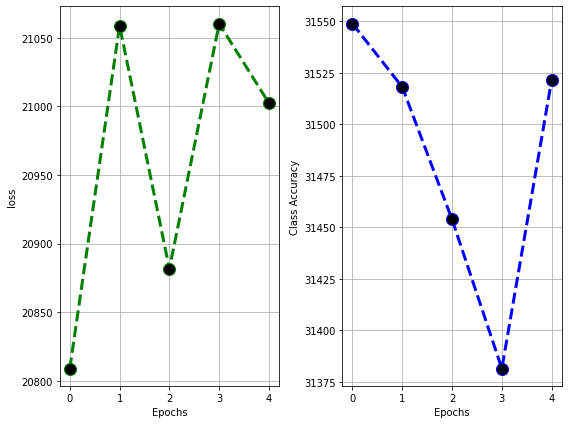

For optimizer: SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.0003
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


 95%|█████████▌| 95/100 [37:16<01:57, 23.54s/it]


KeyboardInterrupt: ignored

In [ ]:
import warnings
warnings.filterwarnings("ignore")

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(DEVICE)

params = [p for p in model.parameters() if p.requires_grad]
optimizer1 = torch.optim.Adam(params, lr=3e-4, weight_decay=0)
optimizer2 = torch.optim.SGD(params, lr=3e-4, weight_decay=0, momentum=0.9)
optimizer3 = torch.optim.RMSprop(params, lr=3e-4, weight_decay=0)
optimizer4 = torch.optim.Adagrad(params, lr=3e-4, weight_decay=0)
lr_scheduler = None

n_batches, n_batches_val = len(dl_train), len(dl_val)

final_validation_losses = []
finalepoch_list=[]
train_loss_list=[]
test_loss_list=[]


optimizer_list=[optimizer1, optimizer2, optimizer3, optimizer4]
for different_optimizer in optimizer_list:
  print('For optimizer:', different_optimizer)
  # n=len(optimizer_list)
  optimizer=different_optimizer
  validation_losses = []

  epoch_list=[]
  train_loss_list=[]
  test_loss_list=[]

  for epoch in range(NUM_EPOCHS):
      epoch_list.append(epoch)
      time_start = time.time()
      loss_accum = 0
      loop = tqdm(dl_train, leave=True)

      for batch_idx, (images, targets) in enumerate(loop):
          images = [image.to(DEVICE) for image in images]
          targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

          # Predict
          model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
          model.to(DEVICE)
          loss_dict = model(images, targets)
          losses = sum(loss for loss in loss_dict.values())
          loss_value = losses.item()

          loss_accum += loss_value

          # Back-prop
          optimizer.zero_grad()
          losses.backward()
          optimizer.step()

      train_loss_list.append(loss_accum)

      
      # update the learning rate
      # if lr_scheduler is not None:
      #     lr_scheduler.step()

      # Validation 
      val_loss_accum = 0
          
      with torch.no_grad():
          for batch_idx, (images, targets) in enumerate(dl_val):
              images = list(image.to(DEVICE) for image in images)
              targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
              
              val_loss_dict = model(images, targets)
              val_batch_loss = sum(loss for loss in val_loss_dict.values())
              val_loss_accum += val_batch_loss.item()

          test_loss_list.append(val_loss_accum)
      
      # Logging
      val_loss = val_loss_accum / n_batches_val
      train_loss = loss_accum / n_batches
      validation_losses.append(val_loss)
      
      # Save model
      chk_name = f'fasterrcnn_resnet50_fpn-e{epoch}.bin'
      torch.save(model.state_dict(), chk_name)
      
      elapsed = time.time() - time_start
      
      print(f"[Epoch {epoch+1:2d} / {NUM_EPOCHS:2d}] Train loss: {train_loss:.3f}. Val loss: {val_loss:.3f} --> {chk_name}  [{elapsed:.0f} secs]") 
    
  experiment_plots(epoch_list, train_loss_list, test_loss_list)
  # plt.figure()
  # plt.plot(epoch_list, train_loss_list, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=9)
  # plt.xlabel('Epochs')
  # plt.ylabel('Training loss list')
  # plt.plot(epoch_list, test_loss_list, color='green', linestyle='dashed', marker='o', markerfacecolor='black', markersize=9)
  # plt.xlabel('Epochs')
  # plt.ylabel('Testing loss list')
  # plt.savefig('myfilename%03d.png'%(n))

The code given below is used for testing purpose. It takes quite a lot of time and cuda memory to run the entire model. Hence the below code to check the training and inference of the model.

In [ ]:
# import pandas as pd
# train_file = pd.read_csv('/content/drive/MyDrive/pascalvoc/train.csv', header=None)
# test_file = pd.read_csv('/content/drive/MyDrive/pascalvoc/test.csv', header=None)
# print(len(train_file))
# print(len(test_file))

In [ ]:
# train_df = pd.DataFrame(train_file)
# test_df = pd.DataFrame(test_file)
# sample=train_df.head(10)
# sample

In [ ]:
# from operator import add
# tt=[]
# for i in range(len(sample)):
#   dd={}
#   img_path = os.path.join(IMG_DIR, sample.iloc[i, 0])
#   image = np.array(Image.open(img_path).convert("RGB"))
#   label_path = os.path.join(LABEL_DIR, sample.iloc[i, 1])
#   bboxes = np.roll(np.loadtxt(fname=label_path, delimiter=" ", ndmin=2), 4, axis=1).tolist()
#   # print(len(bboxes))
#   temp1=[]
#   temp2=[]
#   for b in range(len(bboxes)):
#     tempo = bboxes[b][0:4]
#     pupu=list( map(add, tempo[2:4], tempo[0:2]) )
#     temp1.append(tempo[0:2]+pupu)
#     #temp_box = torchvision.ops.box_convert(bboxes[b][0:4], "cxcywh", "xyxy")
#     #temp1.append(temp_box)
#     temp3= bboxes[b][4:5]
#     s = [str(integer) for integer in temp3]
#     a_string = "".join(s)
#     res = int(float(a_string))
#     temp2.append(res)
    
#   dd['boxes'] = torch.Tensor(temp1)
#   dd['labels'] =torch.tensor(temp2)
#   tt.append(dd)


In [ ]:
# img_list=[]
# for i in range(len(sample)):
#   img_path = os.path.join(IMG_DIR, sample.iloc[i, 0])
#   image = np.array(Image.open(img_path).convert("RGB"))
#   hh=torch.permute(torch.Tensor(image), (2,0,1))
#   img_list.append(hh)

In [ ]:
# img_list

In [ ]:
# type(img_list)

In [ ]:
# tt

In [ ]:
# model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)

In [ ]:
# output = model(img_list, tt)

In [ ]:
# output

In [ ]:
# losses = sum(loss for loss in output.values())
# losses

In [ ]:
# loss_value = losses.item()
# loss_value

For Inference

In [ ]:
# sample2=test_df.head(10)
# sample2

In [ ]:
# img_list2=[]
# for i in range(len(sample2)):
#   img_path = os.path.join(IMG_DIR, sample2.iloc[i, 0])
#   image = np.array(Image.open(img_path).convert("RGB"))
#   hh=torch.permute(torch.Tensor(image), (2,0,1))
#   img_list2.append(hh)

In [ ]:
# model.eval()
# predictions = model(img_list2)

In [ ]:
# predictions